In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
os.chdir("C:\\Users\\HP\\Desktop\\code challenges\\datasets")

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
X = df.drop(columns=['Class'])
y = df['Class']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [9]:
clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [10]:
y_pred_smote = clf_smote.predict(X_test)

In [11]:
print("SMOTE - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))
print("\nSMOTE - Classification Report:")
print(classification_report(y_test, y_pred_smote))

SMOTE - Confusion Matrix:
[[85281    14]
 [   32   116]]

SMOTE - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

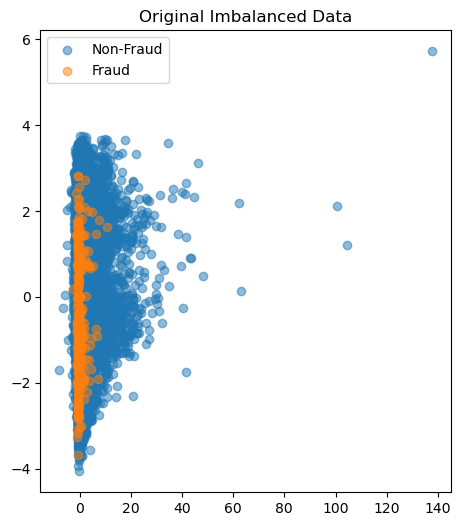

In [14]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(X_train_pca[y_train == 0][:, 0], X_train_pca[y_train == 0][:, 1], label='Non-Fraud', alpha=0.5)
plt.scatter(X_train_pca[y_train == 1][:, 0], X_train_pca[y_train == 1][:, 1], label='Fraud', alpha=0.5)
plt.title('Original Imbalanced Data')
plt.legend()

In [15]:
X_train_smote_pca = pca.transform(X_train_smote)

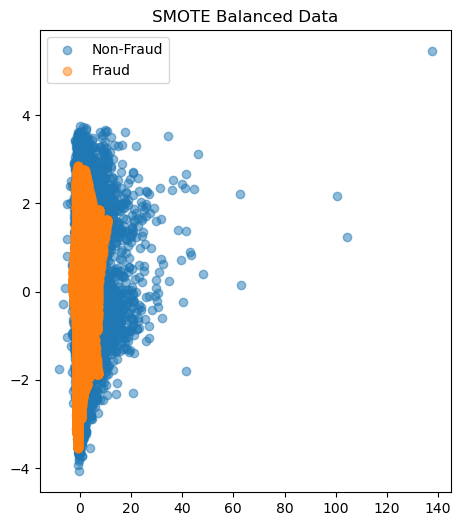

In [16]:
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 2)
plt.scatter(X_train_smote_pca[y_train_smote == 0][:, 0], X_train_smote_pca[y_train_smote == 0][:, 1], label='Non-Fraud', alpha=0.5)
plt.scatter(X_train_smote_pca[y_train_smote == 1][:, 0], X_train_smote_pca[y_train_smote == 1][:, 1], label='Fraud', alpha=0.5)
plt.title('SMOTE Balanced Data')
plt.legend()

In [17]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [18]:
X_train_adasyn_pca = pca.transform(X_train_adasyn)

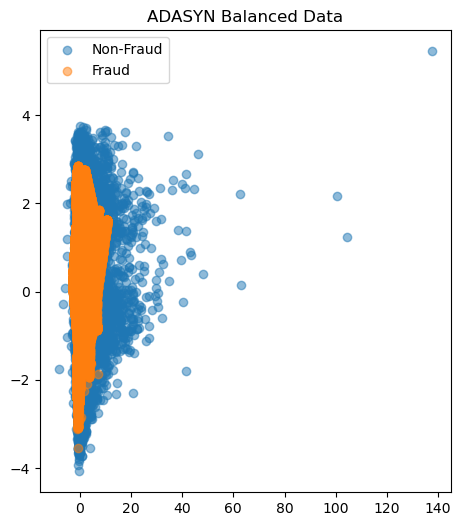

In [19]:
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 3)
plt.scatter(X_train_adasyn_pca[y_train_adasyn == 0][:, 0], X_train_adasyn_pca[y_train_adasyn == 0][:, 1], label='Non-Fraud', alpha=0.5)
plt.scatter(X_train_adasyn_pca[y_train_adasyn == 1][:, 0], X_train_adasyn_pca[y_train_adasyn == 1][:, 1], label='Fraud', alpha=0.5)
plt.title('ADASYN Balanced Data')
plt.legend()

plt.show()
